<a href="https://colab.research.google.com/github/pduyn308/ANN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/nhandienkhuonmat")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nhandienkhuonmat


In [127]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

In [128]:
def load_data(base_path, class_names, sub_folder):
    data = []
    labels = []

    for i, class_name in enumerate(class_names):
        folder_path = os.path.join(base_path, 'AI', sub_folder, class_name)
        for filename in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (64, 64))
                img = img.astype('float32') / 255.0
                data.append(img)
                labels.append(i)
            except:
                continue

    data = np.array(data)
    labels = to_categorical(labels, num_classes=len(class_names))
    return data, labels

In [129]:
guess_classes = ['Thuy Linh', 'Thuy Vy', 'Phuong Duyen', 'Ngoc Lan', 'Kim Tuyen']
emotion_classes = ['sad', 'happy', 'angry']

x_data, y_data = load_data(path, guess_classes, 'Nhận diện khuôn mặt')
X_data, Y_data = load_data(path, emotion_classes, 'Cảm xúc')

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [288]:
def create_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [368]:
guess_model = create_model(len(guess_classes))
emotion_model = create_model(len(emotion_classes))

guess_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
emotion_model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - accuracy: 0.1271 - loss: 5.7080 - val_accuracy: 0.6000 - val_loss: 1.3789
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.5532 - loss: 2.2003 - val_accuracy: 0.1000 - val_loss: 1.7688
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6186 - loss: 2.9438 - val_accuracy: 0.0000e+00 - val_loss: 1.9302
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.6632 - loss: 2.8024 - val_accuracy: 0.0000e+00 - val_loss: 1.7669
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.6736 - loss: 1.9948 - val_accuracy: 0.3000 - val_loss: 1.6536
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.6632 - loss: 2.0734 - val_accuracy: 0.3000 - val_loss: 1.5797
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.6974 - loss: 1.1223 - val_accuracy: 0.6000 - val_loss: 1.6104
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.9383 - loss: 0.5636 - val_accuracy: 0.6000 - v

In [369]:
guess_model.save('guess_model.h5')
emotion_model.save('emotion_model.h5')

In [370]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def predict_guess_and_emotion(image_path):
    img = preprocess_image(image_path)
    guess_pred = guess_model.predict(img)
    emotion_pred = emotion_model.predict(img)

    guess_idx = np.argmax(guess_pred)
    emotion_idx = np.argmax(emotion_pred)

    return guess_classes[guess_idx], emotion_classes[emotion_idx]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


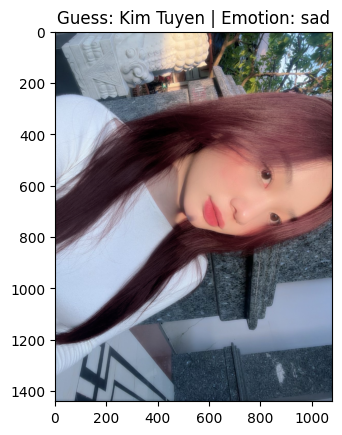

In [162]:
image_path = '/content/image_20.jpg'

guess_model = load_model('guess_model.h5')
emotion_model = load_model('emotion_model.h5')
guess, emotion = predict_guess_and_emotion(image_path)

img_display = cv2.imread(image_path)
img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.title(f"Guess: {guess} | Emotion: {emotion}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


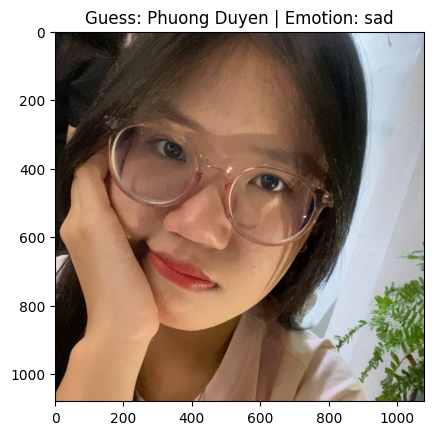

In [360]:
image_path = '/content/0159ff93-8195-4edd-9367-061b922da442.jfif'

guess_model = load_model('guess_model.h5')
emotion_model = load_model('emotion_model.h5')
guess, emotion = predict_guess_and_emotion(image_path)

img_display = cv2.imread(image_path)
img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.title(f"Guess: {guess} | Emotion: {emotion}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


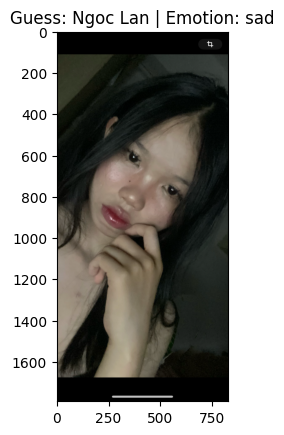

In [149]:
image_path = '/content/IMG_1755.PNG'

guess_model = load_model('guess_model.h5')
emotion_model = load_model('emotion_model.h5')
guess, emotion = predict_guess_and_emotion(image_path)

img_display = cv2.imread(image_path)
img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.title(f"Guess: {guess} | Emotion: {emotion}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


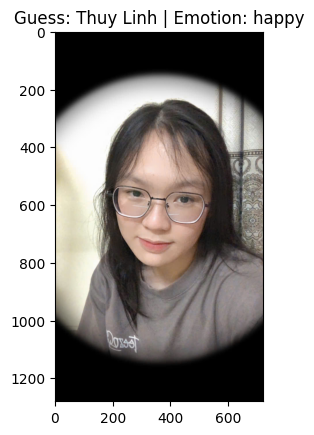

In [371]:
image_path = '/content/h4.jpg'

guess_model = load_model('guess_model.h5')
emotion_model = load_model('emotion_model.h5')
guess, emotion = predict_guess_and_emotion(image_path)

img_display = cv2.imread(image_path)
img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.title(f"Guess: {guess} | Emotion: {emotion}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


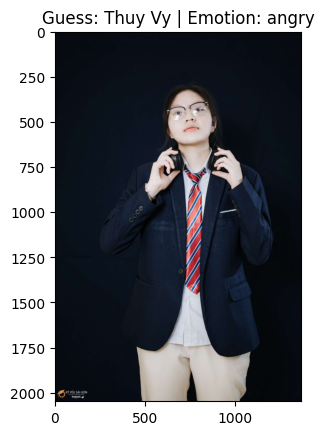

In [298]:
image_path = '/content/483327471_1377448649974315_7091576606491324830_n.jpg'

guess_model = load_model('guess_model.h5')
emotion_model = load_model('emotion_model.h5')
guess, emotion = predict_guess_and_emotion(image_path)

img_display = cv2.imread(image_path)
img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.title(f"Guess: {guess} | Emotion: {emotion}")
plt.show()